In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr



In [2]:
all_wildfire_df = pd.read_csv('intermediary_files/all_wildfire_1964_2024.csv')
madison_wildfire_df = pd.read_csv('intermediary_files/madison_wildfire_1964_2024.csv')
aqi_df = pd.read_csv("intermediary_files/yearly_aqi_1964_2024.csv")
smoke_df = pd.read_csv('intermediary_files/madison_annual_smoke_estimate_1964_2024.csv')


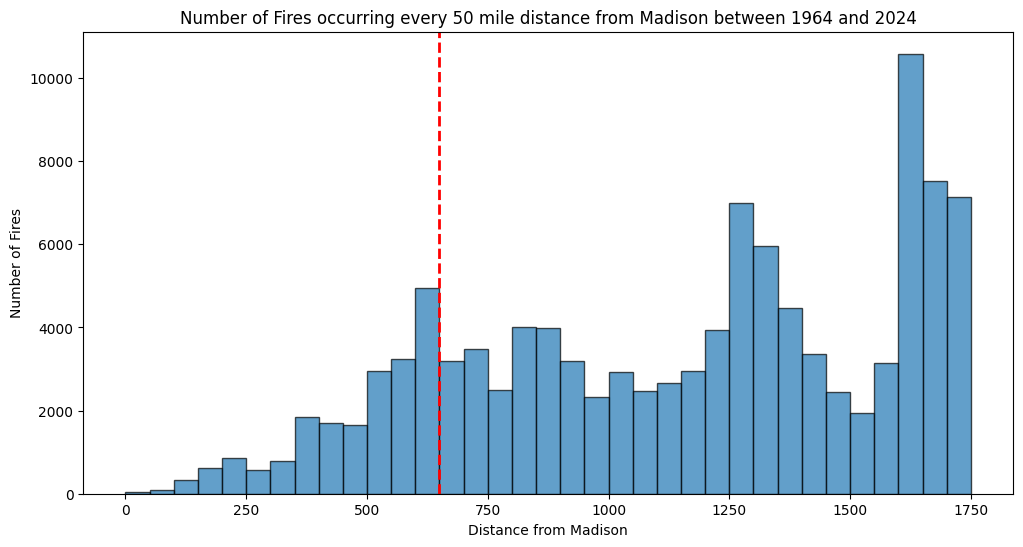

In [10]:
# Create a histogram of the 'shortest_dist' column
plt.figure(figsize=(12, 6))
plt.hist(all_wildfire_df['shortest_dist'], bins=range(0, 1800, 50), alpha=0.7, edgecolor='black')
plt.title('Number of Fires occurring every 50 mile distance from Madison between 1964 and 2024')
plt.xlabel('Distance from Madison')
plt.ylabel('Number of Fires')
plt.axvline(x=650, color='red', linestyle='--', linewidth=2, label='650 miles')
plt.savefig('output_files/histogram_number_of_fires.png')
plt.show()

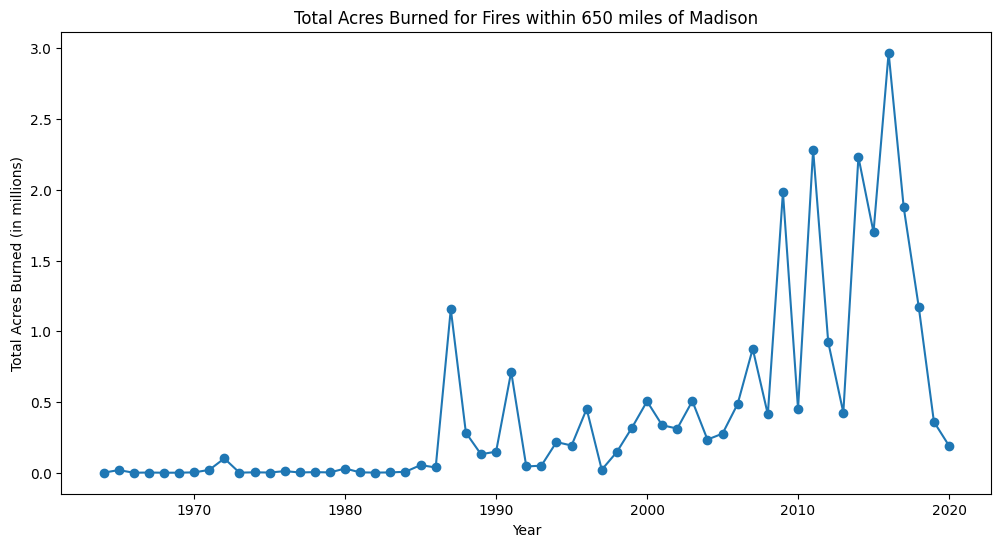

In [8]:
GIS_acres_year = madison_wildfire_df.groupby('Fire_Year')['GIS_Acres'].sum().reset_index()

# Create a time series plot of the total acres burned per year
plt.figure(figsize=(12, 6))

# Apply scaling to the y-axis (logarithmic base 10 scale)
plt.plot(GIS_acres_year['Fire_Year'], GIS_acres_year['GIS_Acres']/1e6, marker='o')
plt.title('Total Acres Burned for Fires within 650 miles of Madison')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned (in millions)')
plt.savefig('output_files/Total_acres_burned.png')
plt.show()

In [5]:
# Merge smoke_df and aqi_df on the year column
merged_df = pd.merge(smoke_df, aqi_df, left_on='Fire_Year', right_on='year', how='inner')

correlation, p_value = pearsonr(merged_df['Smoke_Estimate'], merged_df['aqi'])

print("Correlation between smoke and AQI:", correlation)
print("P-value of the correlation test:", p_value)

Correlation between smoke and AQI: 0.4775799486916772
P-value of the correlation test: 0.0003942970236827778


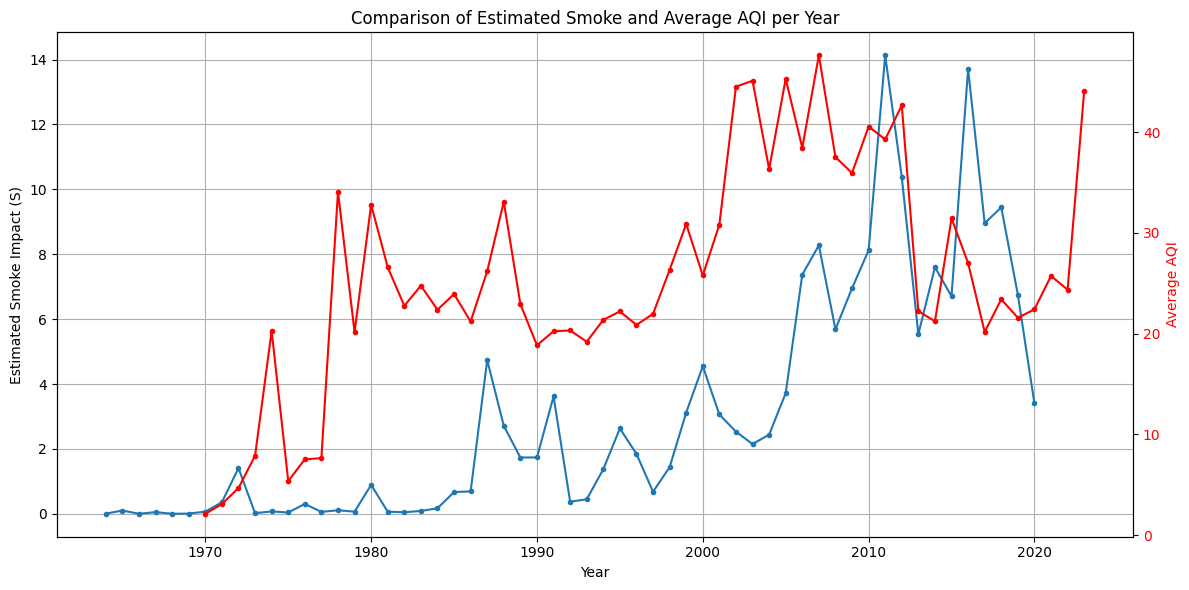

In [7]:
# Plot both average AQI and estimated smoke impact
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot estimated smoke impact on the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Estimated Smoke Impact (S)')
ax1.plot(smoke_df['Fire_Year'], smoke_df['Smoke_Estimate'], label='Estimated Smoke Impact', marker='.')
ax1.tick_params(axis='y')

# Create a second y-axis for average AQI
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis

# Plot average AQI on the secondary y-axis
ax2.set_ylabel('Average AQI', color='red')
ax2.plot(aqi_df['year'], aqi_df['aqi'], color='red', label='Average AQI', marker='.')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('Comparison of Estimated Smoke and Average AQI per Year')
ax1.grid()

# Show the plot
plt.tight_layout()
plt.savefig('output_files/compare_smoke_vs_aqi.png')
plt.show()
